In [122]:
#K. David Roell CFPB 8/30/2016
#Ingests CSVs of quality edits 
#Writes CSV of macro edits by agency code
#Visualizes edits by number and year
#
import pandas as pd
import numpy as np
#from bokeh import charts, io
#from bokeh.plotting import figure, show, output_notebook
#from bokeh.io import output_notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
get_ipython().magic(u'matplotlib inline')
matplotlib.style.use('ggplot')
#output_notebook()

In [123]:
year = 2014 #start year
quality_dfs = {}
while year > 1991:
    try:
        load_df = pd.read_csv('quality_edits'+str(year)+'.csv')
        load_df['year'] = year
        #print(load_df.head())
    except OSError as e:
        print("data not loaded for {year}".format(year=year), e)
        break
    quality_dfs[year] = load_df
#    print(load_df.head())
    year -=1
quality_dfs[2014].head()

data not loaded for 2003 File b'quality_edits2003.csv' does not exist


,year,agency,q035,q001,q002,q003,q004,q005,q013,q036,...,q067,q039,q066,q044,q045,q046,q051,q052,q064,arid
0,2014,3,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000026967
1,2014,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000062542
2,2014,1,2.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000014062
3,2014,2,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000456157
4,2014,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000529958


In [124]:
#load all annual CSVs to dictionary
#create new df copy for summary table
#create macro_dfs.keys()

for key in quality_dfs.keys():
    summary_df = quality_dfs[key].copy() #copy df to create summary table
    #print(summary_df.head())
    #summary_df.drop(['q081_numer', 'q081_denom', 'q015_count'], axis=1, inplace=True)#drop unnecessary columns
    #summary_df = summary_df.rename(columns={'q015_value':'q015'}) #standardize names
    #print(summary_df.head()) #view df for checking errors
    #get counts of macro edits by agency code
    by_agency_df = summary_df.groupby('agency').sum() #produce counts of each edit type
#    print(by_agency_df.head())
#    by_agency_df.drop('arid', axis=1, inplace=True) #drop arid
    by_agency_df.drop('year', axis=1, inplace=True)
    #add total index and sum each edit count
    sum_df = by_agency_df.sum() #put sums of edits in new frame
    sum_df.name=('total') #name the frame (required to append)
    by_agency_df = by_agency_df.append(sum_df)
    by_agency_df['totals'] = by_agency_df.sum(axis=1)
    #print(by_agency_df)
    by_agency_df['year'] = key
    try:
        print('writing quality by agency {year}'.format(year=key))
        by_agency_df.to_csv('quality_by_agency_'+str(key)+'.csv') #write to file
    except:
        print('not written for {year}'.format(year=key))

writing quality by agency 2004
writing quality by agency 2005
writing quality by agency 2006
writing quality by agency 2007
writing quality by agency 2008
writing quality by agency 2009
writing quality by agency 2010
writing quality by agency 2011
writing quality by agency 2012
writing quality by agency 2013
writing quality by agency 2014


In [125]:
annuals = {}
for key in quality_dfs.keys():
    quality_dfs[key].drop(['agency', 'arid', 'year'], axis=1, inplace=True)
    annuals[key] = quality_dfs[key].count()
    annuals[key].name = str(key)
    #print(key, macro_dfs[key].count())

In [126]:
first = True
for key in annuals.keys():

    if first:
        first = False
        base = pd.DataFrame(annuals[key].copy())
        base = base.T
    else:
        new = pd.DataFrame(annuals[key].copy())
        new = new.T
        base = pd.concat([base, new], axis=0)
print('writing quality counts by year')
base.to_csv('quality_counts_by_year.csv')

writing quality counts by year


In [127]:
base

,q001,q002,q003,q004,q005,q013,q014,q024,q025,q027,...,q040,q044,q045,q046,q051,q052,q064,q066,q067,q068
2004,2021,693,16,3,4,3138,611,1294,2408,5526,...,2260.0,2669,854,NaN,54,31.0,119,461,1010,2667
2005,2477,921,19,1,17,3157,728,1223,2372,5695,...,2117.0,2672,1037,NaN,10,8.0,25,444,622,2214
2006,2619,1045,36,2,15,3055,794,1089,2455,5876,...,2068.0,2610,1288,NaN,7,3.0,10,464,568,2153
2007,2704,1103,53,3,21,3073,837,1014,2100,5732,...,1893.0,2443,984,NaN,4,4.0,9,357,484,2111
2008,2647,1013,369,4,12,3299,826,1048,1811,5460,...,1835.0,2563,689,NaN,4,1.0,15,389,408,2179
2009,2146,720,456,19,10,3110,753,993,1792,5447,...,1964.0,2555,647,NaN,3,NaN,9,307,295,1998
2010,2012,617,493,35,11,2894,615,819,1698,5339,...,1927.0,627,95,NaN,3,1.0,6,84,117,1758
2011,1974,629,464,46,19,2912,624,750,1547,5160,...,1903.0,610,96,NaN,5,1.0,3,74,68,1555
2012,2091,690,468,72,21,3076,713,905,1434,5214,...,1979.0,596,79,NaN,2,NaN,6,79,44,1535
2013,2182,834,446,100,27,3169,737,766,1433,5112,...,3.0,523,71,NaN,2,NaN,5,77,52,1615


/Users/roellk/homebrew/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


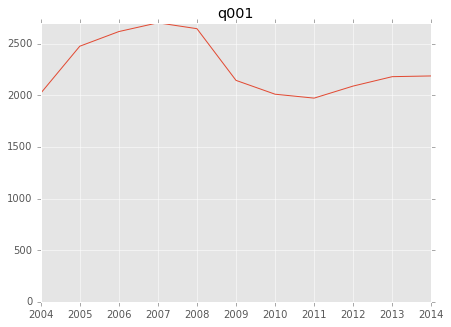

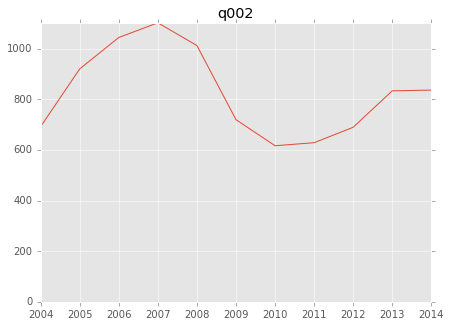

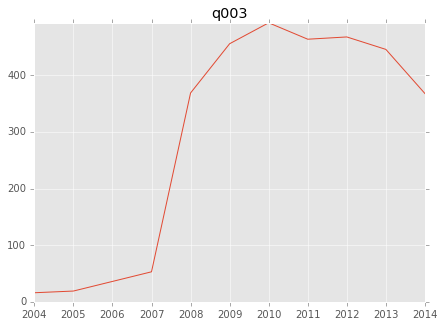

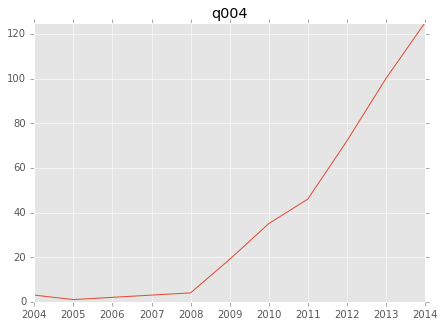

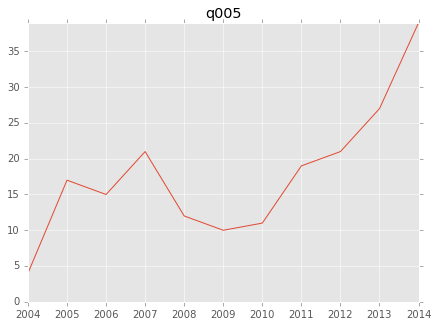

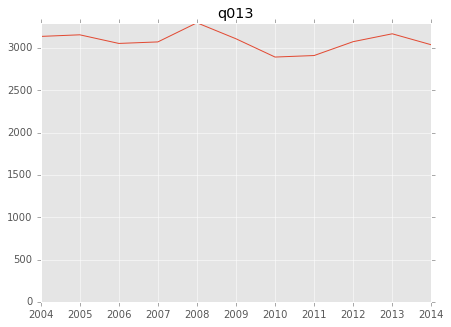

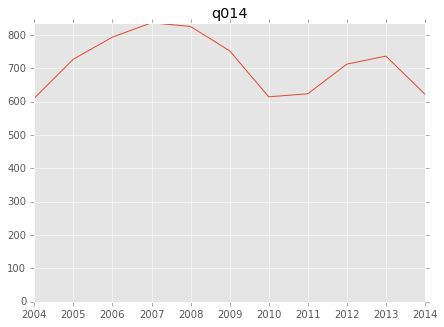

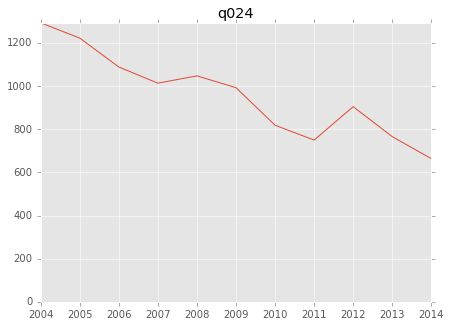

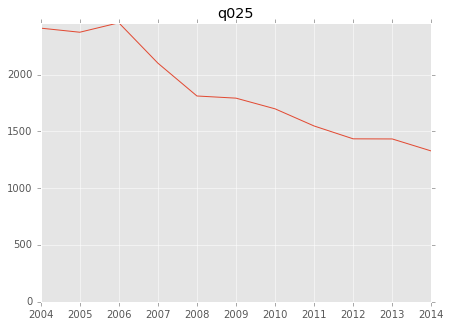

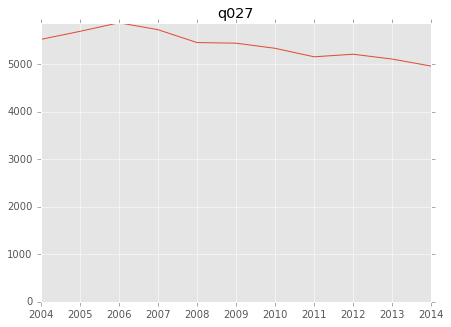

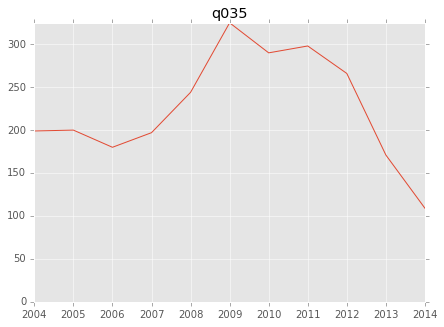

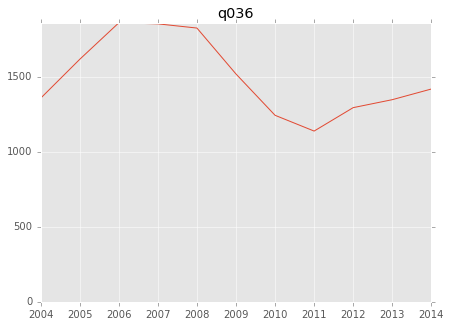

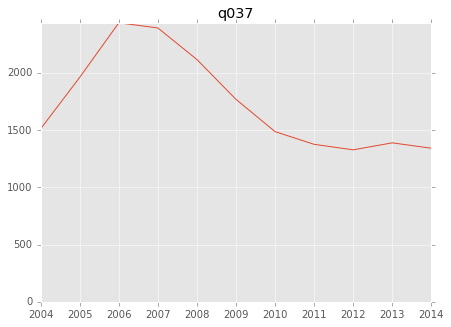

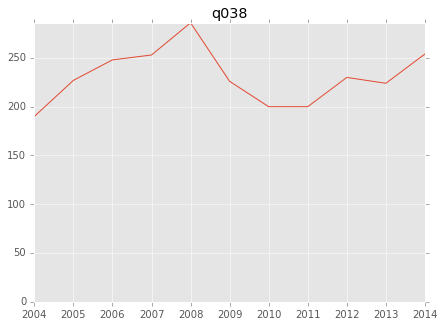

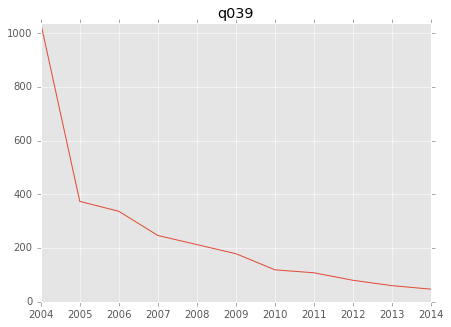

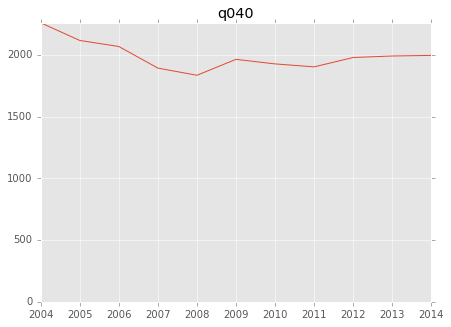

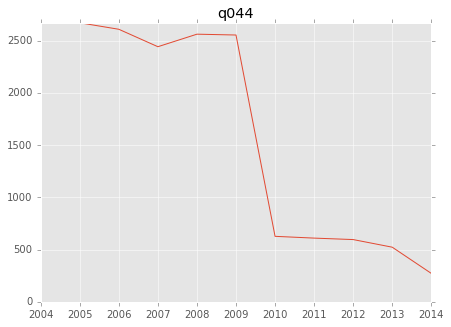

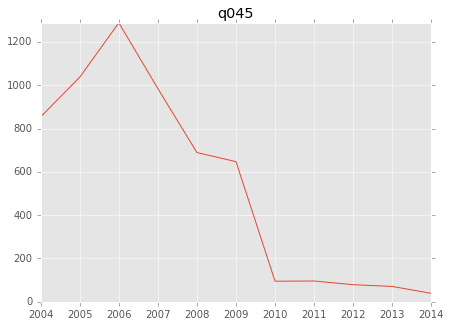

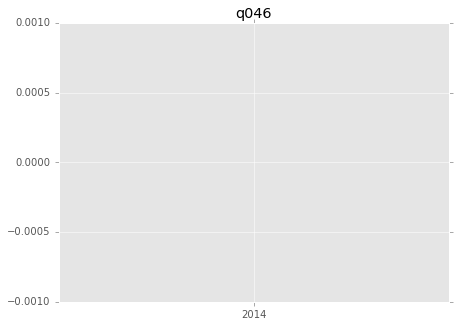

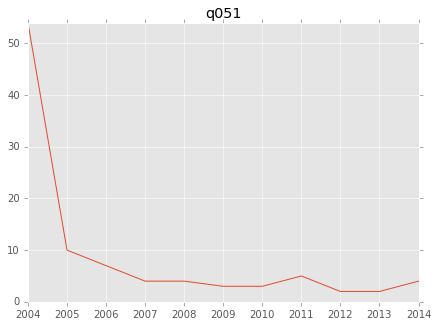

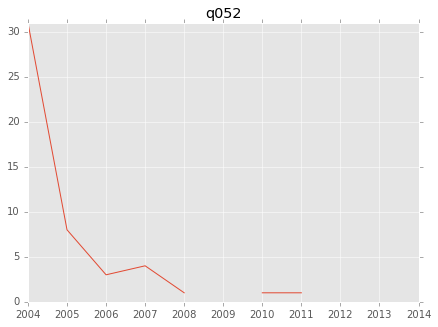

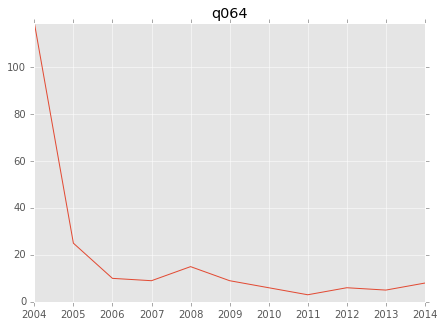

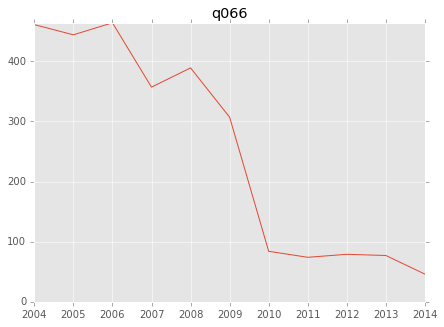

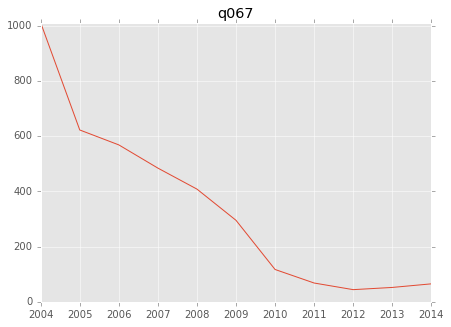

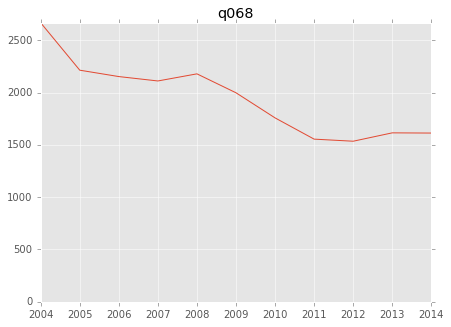

In [129]:
path = 'quality_graphs/'
graph_df.fillna(0)
for col in graph_df.columns:
    y = graph_df[col]
    x = list(range(len(graph_df[col])))
    #print(y)
    #print(x)
    x_ticks = [int(tick[-4:]) for tick in base.index]#list(base.index)
    #x_ticks = np.asarray(x_ticks)
    #print(x_ticks)
    #convert xticks to ndarray
    
    plt.figure(figsize=(7,5))
    plt.xticks(x, x_ticks)
    plt.ylim(0,max(y)+5)
    plt.title(col)
    plt.plot(x, y)
    
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(path + col)

y = np.array(pct_style_df.loc[style])
    y_sum = np.array(pct_style_df.loc['cumulative_pct'])
    x = np.array(range(len(y)))
    my_xticks = pct_style_df.columns.ravel()[1:]
    plt.figure(figsize=(20,10))
    plt.xticks(x, my_xticks)
    plt.ylim(0,100)
    plt.plot(x, y)
    plt.plot(x, y_sum)

    plt.grid(axis='y', linestyle='-')
    plt.title('percent by sprint: '+style)
    red_patch = mpatches.Patch(color='red', label='% Complete in Sprint')
    blue_patch = mpatches.Patch(color='blue', label='Cumulative % Complete')
    plt.legend(handles=[red_patch, blue_patch])
    plt.savefig(path+style.replace(':','')+'_pct_complete')
    #plt.show()